# Assignment-01: Recoding

In this note, I re-code the titanic machine learning in the course.

## Random Choose Method to get optimal $k$ and $b$

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

content = pd.read_csv('C:\\Users\\cam\\NLP\\NLP_Week3\\train.csv')
content = content.dropna()
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

# 线性回归模型
def func(age, k, b): return k * age + b

# 损失函数
def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y - yhat))


# 一些初始值
min_error_rate = float('inf')

loop_times = 10000

losses = []

k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

best_k, best_b = k_hat, b_hat


while loop_times > 0:
    # 随机选取 k, b 值
    k_hat = random.random() * 20 - 10
    b_hat = random.random() * 20 - 10
    
    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(y = sub_fare, yhat = estimated_fares)
    
    # 如果值更小则留下
    if error_rate < min_error_rate:
        
        print('loop == {}'.format(loop_times))
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat

        # print(min_error_rate)
        
        # losses.append(min_error_rate)
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, min_error_rate))
    
    losses.append(error_rate)
    
    loop_times -= 1

loop == 10000
f(age) = 8.959470290560056 * age + -3.2015659979208255, with error rate: 163.71051321752535
loop == 9999
f(age) = 4.577977438839882 * age + -6.8326280052574395, with error rate: 65.01588748073084
loop == 9980
f(age) = 4.266802540337675 * age + 2.4992466817585957, with error rate: 62.952484062666215
loop == 9877
f(age) = 4.220222272036931 * age + 6.124186392763516, with error rate: 62.52634482751483
loop == 9874
f(age) = 4.114390414697397 * age + 9.662424287069825, with error rate: 61.8053923959937
loop == 9522
f(age) = 4.048473332284406 * age + 8.273483516323566, with error rate: 61.545439809630494
loop == 9450
f(age) = 3.928177621581291 * age + 6.834953290730706, with error rate: 61.5145713809056
loop == 9250
f(age) = 3.9082006141748025 * age + 7.833706384248934, with error rate: 61.390519010192605
loop == 8762
f(age) = 3.920916780339873 * age + 8.994762317138381, with error rate: 61.185777688300455
loop == 7409
f(age) = 3.9486613743582755 * age + 8.926905382607465, with

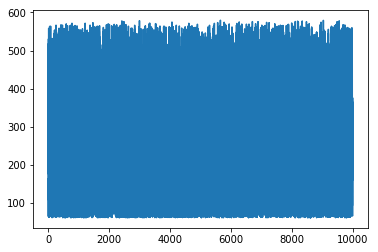

In [98]:
plt.plot(range(len(losses)), losses)
plt.show()

从上可以看出，好好坏坏参差不齐，效果远没有后面的好，在大的空间瞎找，效果总是不容易特别理想的。

## Supervised Direction to get optimal $k$ and $b$

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


content = pd.read_csv('C:\\Users\\cam\\NLP\\NLP_Week3\\train.csv')
content = content.dropna()
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']


# 模型：线性回归
def func(age, k, b): return k * age + b

# 损失函数
def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y - yhat))

# 定义一些初值
min_error_rate = float('inf')

loop_times = 10000

losses = []

# 两个参数，一共四个方向的增减组合
change_directions = [
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]


k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

best_k, best_b = k_hat, b_hat

best_direction = None

# 增减的步幅在 (0, 1) 之间随便取
def step(): return random.random()

# 随机初始化方向
direction = random.choice(change_directions)


while loop_times > 0:
    k_delta_direction, b_delta_direction = direction
    
    # 按照指定方向增减
    k_delta = k_delta_direction * step()
    b_delta = b_delta_direction * step()

    
    new_k = best_k + k_delta
    new_b = best_b + b_delta

    estimated_fares = func(sub_age, new_k, new_b)
    error_rate = loss(y = sub_fare, yhat = estimated_fares)
    
    # 如果效果更好了，就往这个方向继续走；否则就换一个方向。
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        best_k, best_b = new_k, new_b
        
        
        direction = (k_delta_direction, b_delta_direction)
        print('loop == {}'.format(loop_times))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
        
        print(min_error_rate)    
    else:
        direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))
    
    losses.append(error_rate)
    loop_times -= 1

loop == 10000
f(age) = -7.594203737380822 * age + -1.7554290296176283, with error rate: 481.09946618033945
481.09946618033945
loop == 9998
f(age) = -7.312193316560902 * age + -1.4700723587291122, with error rate: 470.0680282108393
470.0680282108393
loop == 9997
f(age) = -7.281369523822385 * age + -0.941765810185878, with error rate: 468.3651729284705
468.3651729284705
loop == 9996
f(age) = -7.037693843909877 * age + -0.5032298006056037, with error rate: 458.6413110106451
458.6413110106451
loop == 9995
f(age) = -6.101055416339588 * age + -0.1894468330362289, with error rate: 422.6366742767132
422.6366742767132
loop == 9994
f(age) = -5.778010005985533 * age + 0.43393112722674343, with error rate: 409.70356594295885
409.70356594295885
loop == 9993
f(age) = -5.484354808898912 * age + 1.399971034370838, with error rate: 397.54771747314555
397.54771747314555
loop == 9992
f(age) = -4.621939004242964 * age + 1.9008722226794417, with error rate: 364.18423509689455
364.18423509689455
loop == 999

loop == 7504
f(age) = 3.5384289386578365 * age + 37.15240372550462, with error rate: 57.448430230823554
57.448430230823554
loop == 7481
f(age) = 3.494799187469443 * age + 37.338090968218, with error rate: 57.428187005069674
57.428187005069674
loop == 7463
f(age) = 3.4288921272651454 * age + 38.06531839413508, with error rate: 57.424362986584754
57.424362986584754
loop == 7450
f(age) = 3.3768865535589083 * age + 39.01788607204676, with error rate: 57.36154589841973
57.36154589841973
loop == 7448
f(age) = 3.547957537640725 * age + 39.985096331583534, with error rate: 57.347485646417155
57.347485646417155
loop == 7444
f(age) = 3.309182216115679 * age + 40.70385645774827, with error rate: 57.20936840584493
57.20936840584493
loop == 7437
f(age) = 3.4132352787230307 * age + 39.96422673151778, with error rate: 57.15090478348999
57.15090478348999
loop == 7424
f(age) = 3.482250580982613 * age + 39.884085834897554, with error rate: 57.04732231072967
57.04732231072967
loop == 7292
f(age) = 3.4736

loop == 3964
f(age) = 2.644512601606693 * age + 84.6041371816739, with error rate: 51.577960045606666
51.577960045606666
loop == 3956
f(age) = 2.4887664332238737 * age + 85.37225771924015, with error rate: 51.53821584100608
51.53821584100608
loop == 3952
f(age) = 2.516892159691735 * age + 86.26131223842313, with error rate: 51.35046916708395
51.35046916708395
loop == 3948
f(age) = 2.481236134900183 * age + 87.25080286842565, with error rate: 51.25428605673248
51.25428605673248
loop == 3931
f(age) = 2.4719219084719404 * age + 87.74576348785017, with error rate: 51.19182149817618
51.19182149817618
loop == 3914
f(age) = 2.4837695885507967 * age + 87.96564239245653, with error rate: 51.14723396126669
51.14723396126669
loop == 3902
f(age) = 2.4771266955060836 * age + 88.94141182671616, with error rate: 51.085388896761394
51.085388896761394
loop == 3895
f(age) = 2.4285169013419727 * age + 89.15804251175683, with error rate: 51.04193324325191
51.04193324325191
loop == 3856
f(age) = 2.39383340

loop == 804
f(age) = 0.9180603130482833 * age + 127.72865767282629, with error rate: 47.495762998104
47.495762998104
loop == 798
f(age) = 1.0317949826866797 * age + 128.70566037355806, with error rate: 47.46052891130539
47.46052891130539
loop == 790
f(age) = 0.9565754026413757 * age + 128.63918419616633, with error rate: 47.39276700270413
47.39276700270413
loop == 767
f(age) = 0.8803409266396715 * age + 128.96228478262796, with error rate: 47.36450715787614
47.36450715787614
loop == 711
f(age) = 0.8463725459215272 * age + 129.73868625895815, with error rate: 47.299127355454544
47.299127355454544
loop == 650
f(age) = 0.7867493278820814 * age + 130.56772544780495, with error rate: 47.268644482334665
47.268644482334665
loop == 649
f(age) = 0.7692097223641929 * age + 131.34640256096634, with error rate: 47.175235852707736
47.175235852707736
loop == 638
f(age) = 0.8420915799069485 * age + 131.5385148733003, with error rate: 47.13171229289604
47.13171229289604
loop == 596
f(age) = 0.75708183

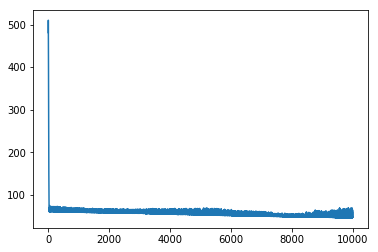

In [96]:
plt.plot(range(len(losses)), losses)
plt.show()

拟合效果甚至好于梯度下降法。

## Gradient Descent to get optimal $k$ and $b$

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random


content = pd.read_csv('C:\\Users\\cam\\NLP\\NLP_Week3\\train.csv')
content = content.dropna()
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] > 130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']


# 模型：线性回归
def func(age, k, b): return k * age + b

# 损失函数
def loss(y, yhat):
    """
    :param y: the real fares
    :param yhat: the estimated fares
    :return: how good is the estimated fares
    """

    return np.mean(np.abs(y - yhat))
    # 选择方差，标准差
    # return np.mean(np.square(y - yhat))
    # return np.mean(np.sqrt(y - yhat))

对于线性回归：

$$\hat{y} = kx+b.$$

对于损失函数 $J(k,b)$ 来说，
不断用下面两个式子迭代，直至最小值。

$$\begin{aligned}
&k = k - \alpha \frac{\partial}{\partial k}J(k,b),\\[6pt]
&b = b - \alpha \frac{\partial}{\partial b}J(k,b),
\end{aligned}$$

其中 $\alpha$ 是学习速度。

比如，我们选用标准差，即，

$$J(k,b) = \frac{1}{m}\sum_{i=1}^m |\hat{y}_i-y_i|=\frac{1}{m} \sum_{i=1}^m|kx_i + b -y_i|,$$

则

$$
\begin{aligned}
&\frac{\partial}
{\partial k}J(k,b)=
\frac{1}{m}\sum_{i=1}^m \delta_i\cdot x_i,\\
&\frac{\partial}{\partial b}J(k,b)=\delta_i,
\end{aligned}
$$
其中

$$\delta_i = 
\begin{cases}
1  &\text{如果 $kx_i+b \geq y_i$},\\
-1  &\text{其他}.
\end{cases}
$$

In [101]:
def derivate_k(y, yhat, x):
    # zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
    # 绝对值版本的导数
    # 就是上面的 $\delta_i$
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])


def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

一些初始化的参数。

In [102]:
# 迭代次数 10000 次
loop_times = 50000

# 初始值随机选择
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10


losses = []

# 学习率是 0.1
learing_rate = 1e-1

梯度下降法的学习过程。

In [103]:
while loop_times > 0:
    # 初始值随机选择的
    k_delta = -1 * learing_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
    b_delta = -1 * learing_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))


    k_hat += k_delta
    b_hat += b_delta

    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(y = sub_fare, yhat = estimated_fares)

    
    print('loop == {}'.format(loop_times))
        # losses.append(min_error_rate)
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    
    losses.append(error_rate)

    loop_times -= 1

loop == 50000
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 70.2843040445327
loop == 49999
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 65.09267326863976
loop == 49998
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 74.562853813469
loop == 49997
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.35416911351511
loop == 49996
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 73.2370920406158
loop == 49995
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 67.61566495839047
loop == 49994
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 71.91133026776261
loop == 49993
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.87716080326584
loop == 49992
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 70.77460875367396
loop == 49991
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 64

loop == 49760
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 74.11022223452107
loop == 49759
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 65.45832423816938
loop == 49758
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 72.78446046166788
loop == 49757
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.71982008304474
loop == 49756
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 71.4586986888147
loop == 49755
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 67.9813159279201
loop == 49754
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 70.16796055422753
loop == 49753
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 63.68179124760408
loop == 49752
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.29815446004471
loop == 49751
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 

loop == 49511
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.31649598332241
loop == 49510
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.48097994480871
loop == 49509
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 63.90430761767143
loop == 49508
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 72.95343553091928
loop == 49507
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 65.1658034625468
loop == 49506
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 71.62767375806608
loop == 49505
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.42729930742213
loop == 49504
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 70.3019119852129
loop == 49503
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 67.68879515229749
loop == 49502
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 

loop == 49285
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 64.26386440437578
loop == 49284
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 71.28529148659723
loop == 49283
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 65.52536024925114
loop == 49282
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 69.95952971374402
loop == 49281
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.78685609412645
loop == 49280
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.63376794089083
loop == 49279
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.04835193900182
loop == 49278
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 67.38402703622084
loop == 49277
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 63.63616357335086
loop == 49276
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

loop == 49070
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 65.59732343511224
loop == 49069
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 64.3369945982823
loop == 49068
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 69.96229979684581
loop == 49067
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 65.59849044315764
loop == 49066
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.63653802399263
loop == 49065
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.859986288033
loop == 49064
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 67.31077625113943
loop == 49063
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.12148213290837
loop == 49062
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.08762814425349
loop == 49061
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 6

loop == 48785
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 67.58519404426666
loop == 48784
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 64.95743423843558
loop == 48783
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 63.173005678615695
loop == 48782
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 69.52407265003046
loop == 48781
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 64.43450152349105
loop == 48780
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 68.19831087717728
loop == 48779
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 65.69599736836639
loop == 48778
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.8725491043241
loop == 48777
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 66.95749321324172
loop == 48776
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

loop == 48533
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.71247174299219
loop == 48532
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.42899760504961
loop == 48531
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.14284802056208
loop == 48530
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.85956315573458
loop == 48529
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 60.326946746507645
loop == 48528
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.17701467928028
loop == 48527
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.95963372711706
loop == 48526
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.49446620282599
loop == 48525
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.59232070772648
loop == 48524
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 48309
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.12743019174568
loop == 48308
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.092155499786415
loop == 48307
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.806005915298876
loop == 48306
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.51985633081134
loop == 48305
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.1246601086432
loop == 48304
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.08384525047894
loop == 48303
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.7976956659914
loop == 48302
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.51154608150385
loop == 48301
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 59.12189002554069
loop == 48300
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

loop == 48048
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.33758486266725
loop == 48047
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.051435278179724
loop == 48046
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.732139333019894
loop == 48045
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.61542419784732
loop == 48044
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.32927461335979
loop == 48043
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.04312502887225
loop == 48042
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.72936924991743
loop == 48041
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.60711394853984
loop == 48040
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.3209643640523
loop == 48039
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.35346897290912
loop == 47806
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.18855439175318
loop == 47805
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.90240480726565
loop == 47804
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.616255222778115
loop == 47803
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.35069888980663
loop == 47802
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.180244142445694
loop == 47801
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.894094557958184
loop == 47800
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.60794497347064
loop == 47799
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.34792880670415
loop == 47798
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 58.171933

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.31736325601916
loop == 47574
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.66011717235513
loop == 47573
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.88135217568674
loop == 47572
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.59520259119921
loop == 47571
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.30905300671167
loop == 47570
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.65734708925264
loop == 47569
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.87304192637928
loop == 47568
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.58689234189174
loop == 47567
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.300742757404194
loop == 47566
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.65457700

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.92678153856766
loop == 47386
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.529923266537956
loop == 47385
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.490770458235254
loop == 47384
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.20462087374774
loop == 47383
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.9184712892602
loop == 47382
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.52715318343548
loop == 47381
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.48246020892779
loop == 47380
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.196310624440244
loop == 47379
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.91016103995272
loop == 47378
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.5243831

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.9755350011716
loop == 47136
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.68938541668406
loop == 47135
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.505269526925794
loop == 47134
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.25337433635167
loop == 47133
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.96722475186413
loop == 47132
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.6810751673766
loop == 47131
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.5024994438233
loop == 47130
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 57.24506408704419
loop == 47129
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.95891450255665
loop == 47128
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.67276491806

loop == 46887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.333524374571255
loop == 46886
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.73813887928801
loop == 46885
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.45198929480046
loop == 46884
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.16583971031294
loop == 46883
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.33075429146876
loop == 46882
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.72982862998053
loop == 46881
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.443679045492985
loop == 46880
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.157529461005446
loop == 46879
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.32798420836625
loop == 46878
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 46637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.9367538377368
loop == 46636
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.65060425324927
loop == 46635
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.1590091391142
loop == 46634
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.21459317291687
loop == 46633
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.92844358842934
loop == 46632
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.6422940039418
loop == 46631
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.15623905601172
loop == 46630
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 56.20628292360939
loop == 46629
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.92013333912185
loop == 46628
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 5

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.13712548260453
loop == 46387
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.985507300340736
loop == 46386
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.69935771585322
loop == 46385
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.41320813136568
loop == 46384
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.13435539950204
loop == 46383
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.97719705103327
loop == 46382
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.69104746654574
loop == 46381
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.4048978820582
loop == 46380
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.13158531639953
loop == 46379
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.968886801

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.18412225878956
loop == 46137
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.89797267430201
loop == 46136
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.962610247147474
loop == 46135
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.461961593969626
loop == 46134
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.175812009482065
loop == 46133
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.88966242499455
loop == 46132
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.959840164044984
loop == 46131
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.453651344662134
loop == 46130
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 55.1675017601746
loop == 46129
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.88135

loop == 45888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.79086509479292
loop == 45887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.94672613690596
loop == 45886
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.66057655241842
loop == 45885
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.3744269679309
loop == 45884
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.788095011690444
loop == 45883
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.93841588759848
loop == 45882
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.65226630311094
loop == 45881
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.366116718623395
loop == 45880
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.78532492858793
loop == 45879
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 45638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.11154608150435
loop == 45637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.873136562937
loop == 45636
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.67553500117193
loop == 45635
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.389385416684405
loop == 45634
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.10323583219687
loop == 45633
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.87036647983449
loop == 45632
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.66722475186447
loop == 45631
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.38107516737693
loop == 45630
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.0949255828894
loop == 45629
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.70139141058245
loop == 45388
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.160299544108355
loop == 45387
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.87414995962083
loop == 45386
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.5880003751333
loop == 45385
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.69862132747999
loop == 45384
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.15198929480089
loop == 45383
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.865839710313345
loop == 45382
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.579690125825806
loop == 45381
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.69585124437748
loop == 45380
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.1436790

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.18993943330511
loop == 45138
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.255010431595316
loop == 45137
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.30517489036884
loop == 45136
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.019025305881314
loop == 45135
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.73287572139378
loop == 45134
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.44672613690624
loop == 45133
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.16057655241871
loop == 45132
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.346423173977584
loop == 45131
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.27581200948242
loop == 45130
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.989662

loop == 44889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.18162918399767
loop == 44888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.895479599510146
loop == 44887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.60933001502261
loop == 44886
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.856672481456926
loop == 44885
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.724565472086326
loop == 44884
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.43841588759879
loop == 44883
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.15226630311125
loop == 44882
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.86611671862373
loop == 44881
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.61419557343152
loop == 44880
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.37414995962096
loop == 44651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.95556444821607
loop == 44650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.489385416684684
loop == 44649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.20323583219713
loop == 44648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.9170862477096
loop == 44647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.630936663222066
loop == 44646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.34478707873454
loop == 44645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.046977190598334
loop == 44644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.46002253579823
loop == 44643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.1738729

loop == 44405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.43937596622642
loop == 44404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 54.42772588927458
loop == 44403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.06627313575847
loop == 44402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.215147189537895
loop == 44401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.08178560113243
loop == 44400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.19409455795895
loop == 44399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.09729806650639
loop == 44398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.17304192638001
loop == 44397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.11281053188037
loop == 44396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 44204
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.89037285875022
loop == 44203
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.95780646931638
loop == 44202
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.905885324124164
loop == 44201
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.93675383773745
loop == 44200
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.92139778949814
loop == 44199
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.91570120615849
loop == 44198
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.93691025487211
loop == 44197
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.89464857457955
loop == 44196
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.952422720246055
loop == 44195
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 44005
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.70006814960898
loop == 44004
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.7248424803968
loop == 44003
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.71558061498294
loop == 44002
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.703789848817856
loop == 44001
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.73291013853325
loop == 44000
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.127612563499305
loop == 43999
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.84146297901177
loop == 43998
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.59674404988599
loop == 43997
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.82041034743283
loop == 43996
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 43783
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.49243250809774
loop == 43782
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.49606803327009
loop == 43781
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.91625522277919
loop == 43780
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.63010563829164
loop == 43779
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.34605152911041
loop == 43778
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.6090530067127
loop == 43777
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.361563994484364
loop == 43776
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.58800037513375
loop == 43775
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.37707645985834
loop == 43774
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

loop == 43552
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.27110286820859
loop == 43551
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.262550027729944
loop == 43550
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.69492558289003
loop == 43549
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.40877599840248
loop == 43548
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.12262641391495
loop == 43547
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.61933673133105
loop == 43546
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.54644912859641
loop == 43545
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.26029954410886
loop == 43544
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.26615113576319
loop == 43543
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 43317
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.29797267430275
loop == 43316
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.011823089815216
loop == 43315
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.11850570640034
loop == 43314
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.435645804496666
loop == 43313
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.14949622000913
loop == 43312
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.870428260412396
loop == 43311
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.12844358843017
loop == 43310
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.885940725786384
loop == 43309
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.10739095685123
loop == 43308
f(age) = 3.97735182438349 * age + 9.654639722431455, with error 

loop == 42933
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.97054885158804
loop == 42932
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.684399267100524
loop == 42931
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.65146969532012
loop == 42930
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.108221981781966
loop == 42929
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.82207239729441
loop == 42928
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.53592281280689
loop == 42927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.008256398921226
loop == 42926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.95974552748832
loop == 42925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.6735959430008
loop == 42924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 42641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.644233062114346
loop == 42640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.35808347762681
loop == 42639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.49135889199608
loop == 42638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.78190619230824
loop == 42637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.495756607820724
loop == 42636
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.20960702333316
loop == 42635
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.848145595597195
loop == 42634
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.63342973801461
loop == 42633
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.347280153527095
loop == 42632
f(age) = 3.97735182438349 * age + 9.654639722431455, with error 

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.13703084604786
loop == 42391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.21933673133133
loop == 42390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.560853560729285
loop == 42389
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.274703976241746
loop == 42388
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.98855439175422
loop == 42387
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.57612343493245
loop == 42386
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.41237710643564
loop == 42385
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.12622752194814
loop == 42384
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.222937839364576
loop == 42383
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.550050

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.339800929150336
loop == 42141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.05365134466279
loop == 42140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.767501760175264
loop == 42139
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.30410127426768
loop == 42138
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.1913244748567
loop == 42137
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.90517489036917
loop == 42136
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.9509156786998
loop == 42135
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.3289976050506
loop == 42134
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.04284802056307
loop == 42133
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.7566984360

loop == 41892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.546449128596315
loop == 41891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.03207911360291
loop == 41890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.97027184327775
loop == 41889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.684122258790204
loop == 41888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.67889351803504
loop == 41887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 50.10794497347166
loop == 41886
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.82179538898412
loop == 41885
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.53746286267308
loop == 41884
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.69437156626944
loop == 41883
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 41642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.78800037513373
loop == 41641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.50185079064618
loop == 41640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.383169233864244
loop == 41639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.374426967931505
loop == 41638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.6284780055697
loop == 41637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.79824968261295
loop == 41636
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.512100098125416
loop == 41635
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.37070385990302
loop == 41634
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.384676275410754
loop == 41633
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.21933673133149
loop == 41392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.64284802056313
loop == 41391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.356698436075604
loop == 41390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.12832158843491
loop == 41389
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.2292746133609
loop == 41388
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.19701964937672
loop == 41387
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.1069919485457
loop == 41386
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.26057655241909
loop == 41385
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.17569000948753
loop == 41384
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.1331527297

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.005052890374
loop == 41142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.915025189542966
loop == 41141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.018194280951
loop == 41140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.9837232504848
loop == 41139
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.89369554965377
loop == 41138
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.04949622000918
loop == 41137
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.962393610595605
loop == 41136
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.92207239729449
loop == 41135
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.126261939087726
loop == 41134
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.34589511197

loop == 40893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.9356802216362
loop == 40892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.110992064884606
loop == 40891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.82484248039705
loop == 40890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.76045455242389
loop == 40889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.697418657682384
loop == 40888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.893851966788546
loop == 40887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.12124137236383
loop == 40886
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.835091787876294
loop == 40885
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.74798917846267
loop == 40884
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 40643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.530260646606756
loop == 40642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.53093666322266
loop == 40641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.59895870754858
loop == 40640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.50893100671755
loop == 40639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.56223860228084
loop == 40638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.57762906765938
loop == 40637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.48760136682837
loop == 40636
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.59354054133902
loop == 40635
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.55629942777019
loop == 40634
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.281629183998454
loop == 40393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.420565355748074
loop == 40392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.330537654917045
loop == 40391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.312931123056636
loop == 40390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.39923571585888
loop == 40389
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.30920801502786
loop == 40388
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.34423306211481
loop == 40387
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.377906075969676
loop == 40386
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.287878375138654
loop == 40385
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.375

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.14272602056809
loop == 40143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.08301422554989
loop == 40142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.21142408150992
loop == 40141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.12139638067889
loop == 40140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.114316164608056
loop == 40139
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.190094441620715
loop == 40138
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.10006674078968
loop == 40137
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.14561810366623
loop == 40136
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.16876480173151
loop == 40135
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.0787371

loop == 39894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.011823089816
loop == 39893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.933584746329906
loop == 39892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.88439926710132
loop == 39891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.00228280727173
loop == 39890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.91225510644071
loop == 39889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.91570120615949
loop == 39888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.98095316738254
loop == 39887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.89092546655152
loop == 39886
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.94700314521767
loop == 39885
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate:

loop == 39644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.6557454111499
loop == 39643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.81320813136742
loop == 39642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.72444347209173
loop == 39641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.68578430865274
loop == 39640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.793141533033555
loop == 39639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.70311383220253
loop == 39638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.71708624771092
loop == 39637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.77181189314437
loop == 39636
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.68178419231334
loop == 39635
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.58329123386068
loop == 39394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.53663183774276
loop == 39393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.455867411146
loop == 39392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.60532989868459
loop == 39391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.51530219785356
loop == 39390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.48716935020418
loop == 39389
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.58400025879539
loop == 39388
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.493972557964376
loop == 39387
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.518471289262344
loop == 39386
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.562670618

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.258792502562656
loop == 39144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.38467627541179
loop == 39143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.327490563504504
loop == 39142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.2572524526971
loop == 39141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.396188624446324
loop == 39140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.30616092361531
loop == 39139
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.288554391755284
loop == 39138
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.37485898455713
loop == 39137
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.284831283726106
loop == 39136
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.31985

loop == 38895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.13967892915541
loop == 38894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.04965122832438
loop == 38893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.18606131696284
loop == 38892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.118349289266206
loop == 38891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.05863749424816
loop == 38890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.18704735020803
loop == 38889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.09701964937701
loop == 38888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.08993943330633
loop == 38887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.16571771031885
loop == 38886
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 38645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.95614441945573
loop == 38644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.93053765491712
loop == 38643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.84050995408611
loop == 38642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.987446358513886
loop == 38641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.90920801502793
loop == 38640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.86002253579921
loop == 38639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.97790607596976
loop == 38638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.88787837513873
loop == 38637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.89132447485738
loop == 38636
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.74272602056804
loop == 38395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.65269831973702
loop == 38394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.757529461006776
loop == 38393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.72139638067883
loop == 38392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.63136867984781
loop == 38391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.78883140006494
loop == 38390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.70006674078963
loop == 38389
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.66140757735027
loop == 38388
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.768764801731464
loop == 38387
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.6787371

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.52761256349966
loop == 38145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.53358474632976
loop == 38144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.44355704549873
loop == 38143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.55891450255783
loop == 38142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.51225510644055
loop == 38141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.43149067984316
loop == 38140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.58095316738238
loop == 38139
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.49092546655135
loop == 38138
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.462792618901325
loop == 38137
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.55962352

loop == 37896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.255745411149626
loop == 37895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.32899760505073
loop == 37894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.32444347209146
loop == 37893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.23441577126044
loop == 37892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.36029954410891
loop == 37891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.30311383220227
loop == 37890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.232875721394215
loop == 37889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.37181189314408
loop == 37888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.28178419231307
loop == 37887
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 37646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.16877500135629
loop == 37645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.93623423825678
loop == 37644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.09895870754848
loop == 37643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.04921921169882
loop == 37642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.1676567684903
loop == 37641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.07762906765928
loop == 37640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.08052115075698
loop == 37639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.146327128601115
loop == 37638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.05629942777008
loop == 37637
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.91808248058054
loop == 37396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.82459988922633
loop == 37395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.93912491253461
loop == 37394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.84909721170357
loop == 37393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.296700958526095
loop == 37392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.422383822744344
loop == 37391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.649253628838515
loop == 37390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.89729665768696
loop == 37389
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.873041926380175
loop == 37388
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.96599

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.619160232034226
loop == 37146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.060056952938254
loop == 37145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.86654873524929
loop == 37144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.77652103441825
loop == 37143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.68649333358724
loop == 37142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.216301913613115
loop == 37141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.80974194948576
loop == 37140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.15091567870003
loop == 37139
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.88427726710523
loop == 37138
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.794249

loop == 36897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.80974194948584
loop == 36896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.109918448783155
loop == 36895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.76239361059552
loop == 36894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.6723659097645
loop == 36893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.582338208933464
loop == 36892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.64711647099121
loop == 36891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.30908742385241
loop == 36890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.535957229946604
loop == 36889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.63053765491685
loop == 36888
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 36647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.97833950141477
loop == 36646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.622504413919614
loop == 36645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.53247671308858
loop == 36644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.44244901225755
loop == 36643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.60288351472565
loop == 36642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.640112354600376
loop == 36641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.86698216069457
loop == 36640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.09385196678873
loop == 36639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.42111937236835
loop == 36638
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.3028368238919
loop == 36397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.888756090902895
loop == 36396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.45396277011287
loop == 36395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.680832576207045
loop == 36394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.907702382301224
loop == 36393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.2815071840027
loop == 36392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.18583099948518
loop == 36391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.31832920710368
loop == 36390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.7957910249605
loop == 36389
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.479291117

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.09201341763004
loop == 36147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.652023711941126
loop == 36146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.3515902864958
loop == 36145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.26156258566477
loop == 36144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.17153488483375
loop == 36143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.02227409644302
loop == 36142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.31379656512674
loop == 36141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.540666371220915
loop == 36140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.76753617731509
loop == 36139
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.15020524

loop == 35898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.142726020567856
loop == 35897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.07396132468528
loop == 35896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.10160819947576
loop == 35895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.14189499563711
loop == 35894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.07146824989303
loop == 35893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.10243922440651
loop == 35892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.14106397070636
loop == 35891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.06897517510079
loop == 35890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.103270249337264
loop == 35889
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 35648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.03734227149793
loop == 35647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.04328003718837
loop == 35646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.02825495349414
loop == 35645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.038173296428674
loop == 35644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.04244901225761
loop == 35643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.02576187870191
loop == 35642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.03900432135942
loop == 35641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.041617987326866
loop == 35640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.02326880390966
loop == 35639
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.954637377908604
loop == 35398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.930748028286395
loop == 35397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.01822869809074
loop == 35396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.95380635297786
loop == 35395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.928254953494154
loop == 35394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.019059723021485
loop == 35393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.95297532804711
loop == 35392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.92576187870191
loop == 35391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.01989074795224
loop == 35390
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.95214

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.9982840997528
loop == 35148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.86516369369809
loop == 35147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.8307480282864
loop == 35146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.99911512468355
loop == 35145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.86433266876734
loop == 35144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82825495349416
loop == 35143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.999946149614296
loop == 35142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.86350164383659
loop == 35141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82576187870191
loop == 35140
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.0007771745

loop == 34899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.73324110307866
loop == 34898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.979170526345605
loop == 34897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.77569000948758
loop == 34896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.73074802828642
loop == 34895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.98000155127635
loop == 34894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.774858984556836
loop == 34893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.72825495349417
loop == 34892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.9808325762071
loop == 34891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.77402795962609
loop == 34890
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 34649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.68704735020782
loop == 34648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.63324110307866
loop == 34647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.96005695293841
loop == 34646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.686216325277066
loop == 34645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.63074802828642
loop == 34644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.960887977869156
loop == 34643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.68538530034632
loop == 34642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.62825495349418
loop == 34641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.9617190027999
loop == 34640
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.53573417787093
loop == 34399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.940112354600465
loop == 34398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.59757366599731
loop == 34397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.53324110307868
loop == 34396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.94094337953121
loop == 34395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.59674264106656
loop == 34394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.53074802828644
loop == 34393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.94177440446196
loop == 34392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.595911616135815
loop == 34391
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5282549

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50893100671754
loop == 34149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.43573417787094
loop == 34148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.920998781193276
loop == 34147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5080999817868
loop == 34146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.43324110307869
loop == 34145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.92182980612402
loop == 34144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50726895685605
loop == 34143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.43074802828645
loop == 34142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.92266083105476
loop == 34141
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.506437931

loop == 33900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.34992823663448
loop == 33899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.716620604463785
loop == 33898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.59135889199659
loop == 33897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.349097211703736
loop == 33896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.71412752967154
loop == 33895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.59218991692734
loop == 33894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.34826618677298
loop == 33893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.711634454879295
loop == 33892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.59302094185809
loop == 33891
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 33650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50969539670755
loop == 33649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.66033396124866
loop == 33648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.28012214245166
loop == 33647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50720232191531
loop == 33646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.66116498617941
loop == 33645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.27929111752091
loop == 33644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.504709247123074
loop == 33643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.66199601111017
loop == 33642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.27846009259017
loop == 33641
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.30277018895133
loop == 33400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.72930903050075
loop == 33399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.21114707319961
loop == 33398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.30027711415909
loop == 33397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.7301400554315
loop == 33396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.21031604826885
loop == 33395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.29778403936684
loop == 33394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.730971080362245
loop == 33393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.209485023338104
loop == 33392
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.29529096

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.798284099752856
loop == 33150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.14217200394753
loop == 33149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.09335190640286
loop == 33148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.799115124683595
loop == 33147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.14134097901679
loop == 33146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.09085883161062
loop == 33145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.79994614961434
loop == 33144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.14050995408604
loop == 33143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.08836575681837
loop == 33142
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.8007771

loop == 32901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.46864421055619
loop == 32900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.983169233864466
loop == 32899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.37423833299566
loop == 32898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.46947523548694
loop == 32897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.98233820893372
loop == 32896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.37174525820342
loop == 32895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.470306260417686
loop == 32894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.981507184002965
loop == 32893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.36925218341118
loop == 32892
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 32651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.91419416461239
loop == 32650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.16731312523945
loop == 32649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.53845030473901
loop == 32648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.91336313968163
loop == 32647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.16482005044721
loop == 32646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.53928132966977
loop == 32645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.91253211475088
loop == 32644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.16232697565497
loop == 32643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.54011235460052
loop == 32642
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.84521909536033
loop == 32401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.96038791748321
loop == 32400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.607425373991106
loop == 32399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.84438807042958
loop == 32398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.95789484269097
loop == 32397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.60825639892185
loop == 32396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.843557045498834
loop == 32395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.95540176789873
loop == 32394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.6090874238526
loop == 32393
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.84272602

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.716133222784215
loop == 32151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.16260398396535
loop == 32150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.3564558449052
loop == 32149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.715302197853454
loop == 32148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1601109091731
loop == 32147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.35728686983596
loop == 32146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.71447117292271
loop == 32145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.15761783438086
loop == 32144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.3581178947667
loop == 32143
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.7136401479

loop == 31902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.82349185598554
loop == 31901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.050361662079716
loop == 31900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.11310884654452
loop == 31899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.61940316017204
loop == 31898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.51379656512682
loop == 31897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.740666371221
loop == 31896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.54302574405144
loop == 31895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.835780730649375
loop == 31894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.489973850445374
loop == 31893
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 31652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.014493888096005
loop == 31651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.04710399119684
loop == 31650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.262827036040925
loop == 31649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.55983390086295
loop == 31648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.66227301942043
loop == 31647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.889142825514625
loop == 31646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.594549289758056
loop == 31645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.3008436033852
loop == 31644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.352577728561705
loop == 31643
f(age) = 3.97735182438349 * age + 9.654639722431455, with error 

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.64100980837112
loop == 31402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.44011235460045
loop == 31401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.66698216069463
loop == 31400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.430560370090895
loop == 31399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.77871701873784
loop == 31398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.416289639919015
loop == 31397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.6431594460132
loop == 31396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.40413125484216
loop == 31395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.61379656512677
loop == 31394
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.84066637

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.732240632552575
loop == 31152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.241220387841416
loop == 31151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.58928613186418
loop == 31150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.658279413716
loop == 31149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.507425373991005
loop == 31148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.67061324930222
loop == 31147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.47806249310458
loop == 31146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.70493229919877
loop == 31145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.931802105292945
loop == 31144
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.0167099

loop == 30903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.53827380544121
loop == 30902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.30050016623474
loop == 30901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.527369972328934
loop == 30900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.717540979510005
loop == 30899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.56486660322514
loop == 30898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.27667745155331
loop == 30897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.503547257647504
loop == 30896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.586956739607146
loop == 30895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.47418437676106
loop == 30894
f(age) = 3.97735182438349 * age + 9.654639722431455, with error 

loop == 30653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.406040332439716
loop == 30652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.765350091407925
loop == 30651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.376677451553284
loop == 30650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.60354725764748
loop == 30649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.83041706374165
loop == 30648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.15355205984285
loop == 30647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.50121570180399
loop == 30646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.09662204989123
loop == 30645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.92114208754369
loop == 30644
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.19468299171945
loop == 30403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.43395153683454
loop == 30402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.2196137396419
loop == 30401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.26668325079473
loop == 30400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.5712377943606
loop == 30399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.284156675929985
loop == 30398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.51102648202417
loop == 30397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.47682075790427
loop == 30396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.67785191363335
loop == 30395
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.9744613850

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.72044476457259
loop == 30153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.36767948366656
loop == 30152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.35634035554281
loop == 30151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.98664975072218
loop == 30150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.13526951136739
loop == 30149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.28237913670625
loop == 30148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.25285473687175
loop == 30147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.03399627018572
loop == 30146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.67096078605018
loop == 30145
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.317397673

loop == 29904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.2539627701127
loop == 29903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.4808325762069
loop == 29902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.707702382301086
loop == 29901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.288455106935785
loop == 29900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.42337636662273
loop == 29899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.97390736845066
loop == 29898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.05604513463662
loop == 29897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.34941514778617
loop == 29896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.24011235460025
loop == 29895
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

loop == 29654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.5795480436676
loop == 29653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.24592952911543
loop == 29652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.47279933520961
loop == 29651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.239147627711944
loop == 29650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.77923695518374
loop == 29649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.936234238256695
loop == 29648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.49738643988181
loop == 29647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.96116498617914
loop == 29646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.976820757905855
loop == 29645
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.317836200416934
loop == 29404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.168644210555826
loop == 29403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.03399627018694
loop == 29402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.58231812676992
loop == 29401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.23318714684391
loop == 29400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.460056952938096
loop == 29399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.15992325098117
loop == 29398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 51.813031969033865
loop == 29397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.92349185598518
loop == 29396
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.48575

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.88969684213473
loop == 29154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.03831660278224
loop == 29153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.38487221149684
loop == 29152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.15590182828431
loop == 29151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.98557169805785
loop == 29150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.12653894739788
loop == 29149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.35340875349206
loop == 29148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.58027855958623
loop == 29147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.465740425496946
loop == 29146
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.31257304

loop == 28905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.36603564639944
loop == 28904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.83180210529257
loop == 28903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.171557600012726
loop == 28902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.29207442756288
loop == 28901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.09800709144215
loop == 28900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.08635084082492
loop == 28899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.493398459179545
loop == 28898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.162550027730234
loop == 28897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.38941983382441
loop == 28896
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 28655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.3667051523839
loop == 28654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.59357495847808
loop == 28653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.152167018296055
loop == 28652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.56188052174511
loop == 28651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.85977994462767
loop == 28650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.919757045996874
loop == 28649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.48791930290855
loop == 28648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.12598493077724
loop == 28647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.92906200276773
loop == 28646
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.10936443216222
loop == 28405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.909117404430184
loop == 28404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.08000155127579
loop == 28403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.30687135736997
loop == 28402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.53374116346416
loop == 28401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.30285953907243
loop == 28400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.45550933060879
loop == 28399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.79994614961373
loop == 28398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.07044956677326
loop == 28397
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.38154811

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.44607283547199
loop == 28155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.35495531398776
loop == 28154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.740943379530556
loop == 28153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.213662863172836
loop == 28152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.28099409515118
loop == 28151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.007148365680145
loop == 28150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.132888236948524
loop == 28149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.38481120156111
loop == 28148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.07169130196824
loop == 28147
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.33755

loop == 27906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.171834608325845
loop == 27905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.5682517128792
loop == 27904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.771414293657934
loop == 27903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.9394246360267
loop == 27902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.494290494042616
loop == 27901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.037619279807515
loop == 27900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.958701891965575
loop == 27899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.008256398921084
loop == 27898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.23512620501527
loop == 27897
f(age) = 3.97735182438349 * age + 9.654639722431455, with error 

loop == 27656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.97861650972433
loop == 27655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.04762155955598
loop == 27654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.949253628837916
loop == 27653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.176123434932094
loop == 27652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.40299324102627
loop == 27651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.51006175514097
loop == 27650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.32143730844652
loop == 27649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.66919822717585
loop == 27648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.27765178284181
loop == 27647
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.32758034569966
loop == 27406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.009087423851696
loop == 27405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.89526698891924
loop == 27404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.979724542965265
loop == 27403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.20659434905943
loop == 27402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.43346415515363
loop == 27401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.23582352799484
loop == 27400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.534733707337956
loop == 27399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.69966914130322
loop == 27398
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.003413

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.37446138507047
loop == 27156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.379036824394404
loop == 27155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.434179690716924
loop == 27154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.640666371220036
loop == 27153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.14662685209524
loop == 27152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.36021847188036
loop == 27151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.90687135736962
loop == 27150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.097985189859244
loop == 27149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.288966326213966
loop == 27148
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.9714

loop == 26907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.25966445525931
loop == 26906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.84786858728646
loop == 26905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.216267738336214
loop == 26904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.19395247579824
loop == 26903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.91241152357454
loop == 26902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.32619530414856
loop == 26901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.93734227149699
loop == 26900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.94485147645464
loop == 26899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.907979390610556
loop == 26898
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 26657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.472960854150756
loop == 26656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.87833950141381
loop == 26655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.03377114404503
loop == 26654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.8489766205274
loop == 26653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.07584642662158
loop == 26652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.30271623271576
loop == 26651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.443025744063384
loop == 26650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.40066168517566
loop == 26649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.56892121886534
loop == 26648
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.0168436565384
loop == 26407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.24613990248667
loop == 26406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.04177440446083
loop == 26405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.52573790304819
loop == 26404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.012411523574414
loop == 26403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.23928132966859
loop == 26402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.46615113576278
loop == 26401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.55382906816379
loop == 26400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.07600794556294
loop == 26399
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.732356121

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.226815955707316
loop == 26157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.4536857618015
loop == 26156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.47211161664088
loop == 26155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.14498301481454
loop == 26154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.71989074795107
loop == 26153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.375270508420876
loop == 26152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 49.01500510737653
loop == 26151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.78443368423917
loop == 26150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.33228948697428
loop == 26149
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.80936443

loop == 25908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.99523700833884
loop == 25907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.222106814433026
loop == 25906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 47.392887239910145
loop == 25905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 52.46132650511878
loop == 25904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.488311800582615
loop == 25903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.16047726761099
loop == 25902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 53.38736528628222
loop == 25901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.75451678673219
loop == 25900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.13764926038959
loop == 25899
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 25658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.65673285321414
loop == 25657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.37527050842173
loop == 25656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.94852311291638
loop == 25655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.72127578950222
loop == 25654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.32231718780542
loop == 25653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.74620653742466
loop == 25652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.07615341551451
loop == 25651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.71684365653825
loop == 25650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.943713462632424
loop == 25649
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.28607383252188
loop == 25408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.96458959491068
loop == 25407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.71296554019471
loop == 25406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.306250705811024
loop == 25405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.73789628811715
loop == 25404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.01465757063945
loop == 25403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.7085334072307
loop == 25402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.9354032133249
loop == 25401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20569668919053
loop == 25400
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.9603339612

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.355879926705086
loop == 25158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.89035136776369
loop == 25157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.660887977867795
loop == 25156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.309574805534076
loop == 25155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.685818725790234
loop == 25154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.06895119944862
loop == 25153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.65645584490381
loop == 25152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.88332565099798
loop == 25151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20902078891357
loop == 25150
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.90825

loop == 24909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.63318714684281
loop == 24908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.12601491136025
loop == 24907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.60382426595639
loop == 24906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.83069407205057
loop == 24905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.21289890525712
loop == 24904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.855624819973016
loop == 24903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.529062002772996
loop == 24902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.826261939086585
loop == 24901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.05313174518078
loop == 24900
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 24659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.33261122864494
loop == 24658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.83384167247252
loop == 24657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.60105418285385
loop == 24656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.296278406642216
loop == 24655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.6259849307763
loop == 24654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.0589789002802
loop == 24653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.59662204988987
loop == 24652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82349185598405
loop == 24651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.19572439002174
loop == 24650
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate:

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.439004321357984
loop == 24409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.57305444194168
loop == 24408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.664312586599834
loop == 24407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50354725764607
loop == 24406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.32065513794422
loop == 24405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.5284780055685
loop == 24404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.24147549457325
loop == 24403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.85073917939761
loop == 24402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5930209418566
loop == 24401
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.279934916

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.51933673133024
loop == 24159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.18003153185964
loop == 24158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.48997385044381
loop == 24157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.716843656537996
loop == 24156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20486566426006
loop == 24155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.74177440446043
loop == 24154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.587944181677415
loop == 24153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.33789628811693
loop == 24152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.56476609421113
loop == 24151
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.0559318

loop == 23910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.61296554019448
loop == 23909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.83983534628866
loop == 23908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.1306274371133
loop == 23907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.8647660942111
loop == 23906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.31647603763325
loop == 23905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.4608879778676
loop == 23904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.68775778396179
loop == 23903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.65248711796565
loop == 23902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.28387966761831
loop == 23901
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 4

loop == 23660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.177164833235246
loop == 23659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.720721772881426
loop == 23658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5535951512068
loop == 23657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.316843656537934
loop == 23656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.543713462632105
loop == 23655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.955100783937766
loop == 23654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.51435058174569
loop == 23653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.741220387839874
loop == 23652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.1561122016563
loop == 23651
f(age) = 3.97735182438349 * age + 9.654639722431455, with error 

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.57667745155175
loop == 23410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.790714264780355
loop == 23409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.17279933520826
loop == 23408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.39966914130244
loop == 23407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.263134024935276
loop == 23406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.370306260416044
loop == 23405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5971760665102
loop == 23404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20264959777825
loop == 23403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.62210681443264
loop == 23402
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.7031796

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.69911512468191
loop == 23160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.52090817059767
loop == 23159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.29523700833843
loop == 23158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.52210681443262
loop == 23157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.857039842110055
loop == 23156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.49274393354618
loop == 23155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.71961373964036
loop == 23154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.12896538725198
loop == 23153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.7445444875628
loop == 23152
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.433373544

loop == 22911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.53124808867081
loop == 22910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.19544738171189
loop == 22909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.55617883659324
loop == 22908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.75470318444823
loop == 22907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.152300720249755
loop == 22906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.37917052634394
loop == 22905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.159532916902556
loop == 22904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.34980764545752
loop == 22903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.57667745155169
loop == 22902
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 22661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.634849196704025
loop == 22660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.56744556671983
loop == 22659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.230971080360526
loop == 22658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.45784088645471
loop == 22657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.90345664705225
loop == 22656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.05396277011123
loop == 22655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.28083257620541
loop == 22654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.353940868537094
loop == 22653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.55877242039387
loop == 22652
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.98129598223246
loop == 22411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.99551401664857
loop == 22410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.222383822742756
loop == 22409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.46834530067047
loop == 22408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.4654206198397
loop == 22407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.28692675903085
loop == 22406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.29376135619369
loop == 22405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.88304864268734
loop == 22404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.109918448781535
loop == 22403
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.62977243

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.37972454296431
loop == 22161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.60659434905849
loop == 22160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.554703184448705
loop == 22159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.202716232715
loop == 22158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.42958603880919
loop == 22157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.89071426478112
loop == 22156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.0257079224657
loop == 22155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.25257772855988
loop == 22154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.27726144875934
loop == 22153
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.22321484767

loop == 21912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.21296554019418
loop == 21911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.36938462489209
loop == 21910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.80908742385069
loop == 21909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.03595722994487
loop == 21908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.70539570522451
loop == 21907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.632079113601385
loop == 21906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.85894891969556
loop == 21905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.04140678555693
loop == 21904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.45507080335208
loop == 21903
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 21662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.39468299171769
loop == 21661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.62155279781188
loop == 21660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.46107437558477
loop == 21659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.21767468146838
loop == 21658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.44454448756256
loop == 21657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.79708545591717
loop == 21656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.04066637121906
loop == 21655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.267536177313254
loop == 21654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.1330965362496
loop == 21653
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20714836567887
loop == 21412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.21675304594504
loop == 21411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.80327024933536
loop == 21410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.030140055429555
loop == 21409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.7824727244948
loop == 21408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.175669927318275
loop == 21407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.094682991717654
loop == 21406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.52921841990627
loop == 21405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.690804875374155
loop == 21404
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.917674

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.96273642544658
loop == 21162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.920444764570796
loop == 21161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.14731457066498
loop == 21160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.29874750577899
loop == 21159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.743436454321476
loop == 21158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.98325901606131
loop == 21157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.768367202243915
loop == 21156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.118138087496426
loop == 21155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.364489085900416
loop == 21154
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.5913

loop == 20913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.85423977842115
loop == 20912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.08110958451534
loop == 20911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.42568602089444
loop == 20910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.43002456605275
loop == 20909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.72617132849382
loop == 20908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.031802105290964
loop == 20907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.25867191138516
loop == 20906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.06218240882623
loop == 20905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.85479379504166
loop == 20904
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 20663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.460589067986284
loop == 20662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.40398578488888
loop == 20661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.75553420938043
loop == 20660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.00576332412747
loop == 20659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.23263313022165
loop == 20658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.09154528971285
loop == 20657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82875501387816
loop == 20656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.055624819972344
loop == 20655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.4567109516428
loop == 20654
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.97972454296399
loop == 20413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20659434905815
loop == 20412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.120908170599456
loop == 20411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.802716232714666
loop == 20410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.029586038808844
loop == 20409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.49161399873466
loop == 20408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.38182512006847
loop == 20407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.78323504040556
loop == 20406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.980278559584484
loop == 20405
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20714

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.95645584490298
loop == 20163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.183325650997155
loop == 20162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.14196080217859
loop == 20161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.77944753465367
loop == 20160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.00631734074785
loop == 20159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.50712646410903
loop == 20158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.37517692062207
loop == 20157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.80428767198469
loop == 20156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.95700986152347
loop == 20155
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.18387966

loop == 19914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.232265511320016
loop == 19913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.716843656537286
loop == 19912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.94371346263148
loop == 19911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.650616768818566
loop == 19910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 48.24941514776849
loop == 19909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.89459238112611
loop == 19908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.89440598340709
loop == 19907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.12127578950127
loop == 19906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.23060346145853
loop == 19905
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 19664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.96587412745136
loop == 19663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.52307235492266
loop == 19662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 46.335403213323936
loop == 19661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.56227301941812
loop == 19660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.99378533185115
loop == 19659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.58720376734056
loop == 19658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.320354153979466
loop == 19657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.18332565099706
loop == 19656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.410195457091255
loop == 19655
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.08138659282529
loop == 19414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.252764126278784
loop == 19413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.67750847648179
loop == 19412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.92730333739138
loop == 19411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.702439224404245
loop == 19410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.07215470799624
loop == 19409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.29856110806075
loop == 19408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.525430914154924
loop == 19407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.408165788328645
loop == 19406
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.12155

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.197176066509456
loop == 19164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.00290263043407
loop == 19163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.79329795016597
loop == 19162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.02016775626015
loop == 19161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.338913710766484
loop == 19160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.61628963991666
loop == 19159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.93976871135265
loop == 19158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.6412203878391
loop == 19157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.15830429248392
loop == 19156
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.23734227

loop == 18915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.73069407204959
loop == 18914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.957563878143766
loop == 18913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.42921841990792
loop == 18912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.55368576180029
loop == 18911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.95361912686517
loop == 18910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.57861650972272
loop == 18909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.24860900162536
loop == 18908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.17473839337923
loop == 18907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.40160819947342
loop == 18906
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 18665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.51952312904933
loop == 18664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.49108188368389
loop == 18663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.96746954237769
loop == 18662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.51601263160632
loop == 18661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.338913710766796
loop == 18660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.112134515262845
loop == 18659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.33900432135703
loop == 18658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.6749247910992
loop == 18657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.935126205013546
loop == 18656
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.09320733957581
loop == 18415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.22653894739576
loop == 18414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.453408753489946
loop == 18413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.429218419908224
loop == 18412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.04953063714647
loop == 18411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.27640044324063
loop == 18410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.765229500240636
loop == 18409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.872522326897155
loop == 18408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.09939213299133
loop == 18407
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.10124

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.39080487537357
loop == 18165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.51952312904965
loop == 18164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.98692675903008
loop == 18163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.213796565124255
loop == 18162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.855534209382064
loop == 18161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.80991844878076
loop == 18160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.036788254874956
loop == 18159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.191545289714476
loop == 18158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.63291013853147
loop == 18157
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.87439

loop == 17916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.92432288091369
loop == 17915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.15119268700787
loop == 17914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.94583891852349
loop == 17913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.747314570664386
loop == 17912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.974184376758565
loop == 17911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.28184999885591
loop == 17910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.570306260415066
loop == 17909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.88824516564657
loop == 17908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.59523700833752
loop == 17907
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 17666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.03614362766492
loop == 17665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.68471069254799
loop == 17664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.91158049864219
loop == 17663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.37215470799733
loop == 17662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50770238229868
loop == 17661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.902095581159095
loop == 17660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.53263313022114
loop == 17659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1915452897148
loop == 17658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.128755013877644
loop == 17657
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.622106814431625
loop == 17416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.848976620525804
loop == 17415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.46245941713877
loop == 17414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.44509850418232
loop == 17413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.91594599667162
loop == 17412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.47002925210474
loop == 17411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.281849998856224
loop == 17410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.06615113576127
loop == 17409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.29302094185544
loop == 17408
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.617861

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.584433684237666
loop == 17166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.03614362766524
loop == 17165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.18055556789418
loop == 17164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.40742537398837
loop == 17163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.37215470799764
loop == 17162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.003547257644875
loop == 17161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.23041706373906
loop == 17160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.708165788330064
loop == 17159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82653894739556
loop == 17158
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.053408

loop == 16917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.117951689777804
loop == 16916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.34482149587198
loop == 16915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.46245941713909
loop == 16914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.9409433795285
loop == 16913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.16781318562268
loop == 16912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.798470497471484
loop == 16911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.76393506927918
loop == 16910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.99080487537336
loop == 16909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.134481577803896
loop == 16908
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 16667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.552764126280515
loop == 16666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.87833950141211
loop == 16665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.10520930750629
loop == 16664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.88877520661293
loop == 16663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.701331191162794
loop == 16662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.92820099725698
loop == 16661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.22478628694533
loop == 16660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.52432288091347
loop == 16659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.8367216199405
loop == 16658
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.81573562329571
loop == 16417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.0426054293899
loop == 16416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.97907991575435
loop == 16415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.638727313046424
loop == 16414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.86559711914058
loop == 16413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.31509099608678
loop == 16412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.461719002797096
loop == 16411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.85057203545301
loop == 16410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.486649750719536
loop == 16409
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1344815

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.06938462489578
loop == 16167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.57612343493004
loop == 16166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.80299324102421
loop == 16165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.405395705228194
loop == 16164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.39911512468072
loop == 16163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.86442245096555
loop == 16162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.42404587260316
loop == 16161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.224786286945644
loop == 16160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.02016775625966
loop == 16159
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.2470375

loop == 15918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.79877148143651
loop == 15917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.538450304736074
loop == 15916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.97907991575467
loop == 15915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.1345721883926
loop == 15914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.36144199448677
loop == 15913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.31509099608708
loop == 15912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.957563878143276
loop == 15911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.18443368423746
loop == 15910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.65110207641949
loop == 15909
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rat

loop == 15668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.06938462489611
loop == 15667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.07196831027622
loop == 15666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.29883811637039
loop == 15665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.405395705228514
loop == 15664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.894960000026906
loop == 15663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.121829806121085
loop == 15662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.741406785560926
loop == 15661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.71795168977759
loop == 15660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.944821495871764
loop == 15659
f(age) = 3.97735182438349 * age + 9.654639722431455, with error

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.00936443215983
loop == 15418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.236234238254006
loop == 15417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.49570041436995
loop == 15416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.83235612191052
loop == 15415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.05922592800471
loop == 15414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.831711494702354
loop == 15413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.65534781166121
loop == 15412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.88221761775539
loop == 15411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.16772257503477
loop == 15410
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.4783395

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.58600512351137
loop == 15168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.76975224379413
loop == 15167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.99662204988831
loop == 15166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.92201620384378
loop == 15165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.59274393354483
loop == 15164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.819613739638996
loop == 15163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.258027284176194
loop == 15162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.41573562329551
loop == 15161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.79904848974693
loop == 15160
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.4406663

loop == 14919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.934018171771925
loop == 14918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.01232091298521
loop == 14917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.53014005542844
loop == 14916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.757009861522626
loop == 14915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.34833199331763
loop == 14914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.35313174517915
loop == 14913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.812898905259466
loop == 14912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.37806249310157
loop == 14911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.16772257503508
loop == 14910
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 14669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.46753617731205
loop == 14668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.747247935730435
loop == 14667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.49246692523449
loop == 14666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.922016203844095
loop == 14665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.088588808891
loop == 14664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.31545861498518
loop == 14663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.258027284176514
loop == 14662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.91158049864169
loop == 14661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.138450304735876
loop == 14660
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.76109835124296
loop == 14419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.42986304711812
loop == 14418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.01232091298554
loop == 14417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.02598493077462
loop == 14416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.252854736868805
loop == 14415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.34833199331794
loop == 14414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.84897662052532
loop == 14413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.0758464266195
loop == 14412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.684343073650346
loop == 14411
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.67196831

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.10262562212695
loop == 14169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.963381052658235
loop == 14168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.190250858752435
loop == 14167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.43863670245938
loop == 14166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.78637274240892
loop == 14165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.013242548503115
loop == 14164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.77464778279179
loop == 14163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.609364432159616
loop == 14162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.8362342382538
loop == 14161
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.110658

loop == 13920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.12764698063603
loop == 13919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5289414116008
loop == 13918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.723768864292545
loop == 13917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.950638670386724
loop == 13916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.86495249193322
loop == 13915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.54676055404324
loop == 13914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.773630360137425
loop == 13913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.20096357226563
loop == 13912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.36975224379393
loop == 13911
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

loop == 13670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.66116498617616
loop == 13669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.88803479227034
loop == 13668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.95525720107463
loop == 13667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.48415667592685
loop == 13666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.711026482021026
loop == 13665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.29126828140706
loop == 13664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.30714836567754
loop == 13663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.761375359553384
loop == 13662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.33207911359998
loop == 13661
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.825430914153955
loop == 13420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.045561910216065
loop == 13419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.42155279781046
loop == 13418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.69572439002435
loop == 13417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.44648354573292
loop == 13416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.86495249193352
loop == 13415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.042605429389404
loop == 13414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.269475235483604
loop == 13413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.20096357226594
loop == 13412
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.86559

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.358948919694086
loop == 13170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.709574805536874
loop == 13169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.38387966761652
loop == 13168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.95525720107496
loop == 13167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.98000155127303
loop == 13166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20687135736722
loop == 13165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.29126828140738
loop == 13164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.80299324102372
loop == 13163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.02986304711792
loop == 13162
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.6272793

loop == 12921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.321275789500135
loop == 12920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.04556191021638
loop == 12919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.917397673156636
loop == 12918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.14426747925083
loop == 12917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.38157299054879
loop == 12916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.74038936290733
loop == 12915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.967259169001515
loop == 12914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.71758407088121
loop == 12913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.563381052658016
loop == 12912
f(age) = 3.97735182438349 * age + 9.654639722431455, with error 

loop == 12671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.85479379504025
loop == 12670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.08166360113444
loop == 12669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.47187769969023
loop == 12668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.67778548479096
loop == 12667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.90465529088514
loop == 12666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.80788878002265
loop == 12665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.500777174541646
loop == 12664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.72764698063583
loop == 12663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.143899860355056
loop == 12662
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.01905972301807
loop == 12421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.562182408831674
loop == 12420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.61518160667457
loop == 12419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.84205141276875
loop == 12418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.898193489164065
loop == 12417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.43817329642526
loop == 12416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.665043102519434
loop == 12415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.234204569496484
loop == 12414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.26116498617596
loop == 12413
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.70985

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.552577728558184
loop == 12171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.77944753465237
loop == 12170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.98849819830551
loop == 12169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.375569418308885
loop == 12168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.64420084431827
loop == 12167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.40050016623132
loop == 12166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.80788878002297
loop == 12165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.99662204988783
loop == 12164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.223491855982
loop == 12163
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.143899860

loop == 11922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.07880290744694
loop == 11921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.312965540192494
loop == 11920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.6580512598308
loop == 11919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.33789628811494
loop == 11918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.89819348916439
loop == 11917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.934018171771434
loop == 11916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.16088797786562
loop == 11915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.234204569496804
loop == 11914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.757009861522135
loop == 11913
f(age) = 3.97735182438349 * age + 9.654639722431455, with error r

loop == 11672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.671901675343314
loop == 11671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.27529240999854
loop == 11670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.98849819830584
loop == 11669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.871414293655036
loop == 11668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.09828409974922
loop == 11667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.32450927863825
loop == 11666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.69440598340573
loop == 11665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.92127578949992
loop == 11664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.66052035897066
loop == 11663
f(age) = 3.97735182438349 * age + 9.654639722431455, with error ra

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.212688531882144
loop == 11422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.07880290744728
loop == 11421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.80881041553863
loop == 11420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.035680221632845
loop == 11419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.414813987779695
loop == 11418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.63180210528934
loop == 11417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.85867191138354
loop == 11416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.750825068112114
loop == 11415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.45479379504004
loop == 11414
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.68166

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.746206537422275
loop == 11172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.97307634351646
loop == 11171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50511869692114
loop == 11170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.56919822717296
loop == 11169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.79606803326713
loop == 11168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.84112977725355
loop == 11167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.392189916923655
loop == 11166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.61905972301783
loop == 11165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.17714085758596
loop == 11164
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.2151816

loop == 10923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.595423406062594
loop == 10922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.50659434905656
loop == 10921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.733464155150756
loop == 10920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.931434486395005
loop == 10919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.32958603880725
loop == 10918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.592677298612216
loop == 10917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.35451678672969
loop == 10916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.75082506811245
loop == 10915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.950638670386205
loop == 10914
f(age) = 3.97735182438349 * age + 9.654639722431455, with error

loop == 10673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.67086027703435
loop == 10672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.02173919553644
loop == 10671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.266982160690866
loop == 10670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.60652771412473
loop == 10669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.291912908613305
loop == 10668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.841129777253904
loop == 10667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.88803479226981
loop == 10666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.114904598364
loop == 10665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1771408575863
loop == 10664
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.11204390467789
loop == 10423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.20437828257447
loop == 10422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.62037812963727
loop == 10421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.22930903049693
loop == 10420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.931434486395354
loop == 10419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82543091415342
loop == 10418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.0523007202476
loop == 10417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.26744556672776
loop == 10416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.648422603904116
loop == 10415
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.87529240

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.93983534628634
loop == 10173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.166705152380516
loop == 10172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.02173919553678
loop == 10171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.76282703603703
loop == 10170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.98969684213121
loop == 10169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.35775027586919
loop == 10168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.58581872578771
loop == 10167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.812688531881896
loop == 10166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.693761356201605
loop == 10165
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.408810

loop == 9924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.11204390467823
loop == 9923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.700223157920625
loop == 9922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.92709296401481
loop == 9921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.44805498501065
loop == 9920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.52321484767132
loop == 9919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.7500846537655
loop == 9918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.78406606534305
loop == 9917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.346206537422006
loop == 9916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.57307634351621
loop == 9915
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.1200

loop == 9674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.864489085898434
loop == 9673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5383596941521
loop == 9672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.460610969554935
loop == 9671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.68748077564912
loop == 9670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.87437077448451
loop == 9669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.28360265930563
loop == 9668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.54115375290614
loop == 9667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.30853340722806
loop == 9666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.693761356201954
loop == 9665
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.904

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.62866440329355
loop == 9424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.398007091438544
loop == 9423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.624876897532715
loop == 9422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.96467548362595
loop == 9421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.220998781189245
loop == 9420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.555004168418684
loop == 9419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.24592952911167
loop == 9418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.784066065343396
loop == 9417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.84205141276817
loop == 9416
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.0689212188623

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.56227301941634
loop == 9174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.05498019276739
loop == 9173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.15839490307283
loop == 9172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.5688545839312
loop == 9171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.183325650995286
loop == 9170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.87437077448485
loop == 9169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.77944753465179
loop == 9168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.00631734074597
loop == 9167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.21038185481725
loop == 9166
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.602439224402495
lo

loop == 8925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.62866440329388
loop == 8924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.8938519667847
loop == 8923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.120721772878895
loop == 8922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.964675483626294
loop == 8921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.7168436565354
loop == 8920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.94371346262958
loop == 8919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.3006865639587
loop == 8918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.53983534628609
loop == 8917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.766705152380275
loop == 8916
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.63669

loop == 8675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.058117894762496
loop == 8674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.05498019276774
loop == 8673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.65423977841902
loop == 8672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.881109584513176
loop == 8671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.39099127310015
loop == 8670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.4772314681697
loop == 8669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.70410127426388
loop == 8668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.72700235343255
loop == 8667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.30022315792039
loop == 8666
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.5270

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.14528490190918
loop == 8425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.591635900302606
loop == 8424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.8185057063968
loop == 8423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.48129598224159
loop == 8422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.41462759005331
loop == 8421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.641497396147486
loop == 8420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.817307062574
loop == 8419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.237619279803994
loop == 8418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.48963020720008
loop == 8417
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.262550027726434
lo

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.7559018282804
loop == 8175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.57160069138305
loop == 8174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.35202371193693
loop == 8173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.5788935180311
loop == 8172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.90761177171546
loop == 8171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.17501540168761
loop == 8170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.50348062271262
loop == 8169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.199946149610035
loop == 8168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.727002353432916
loop == 8167
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.79606803326656
loo

loop == 7926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.28941983382053
loop == 7925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.51628963991471
loop == 7924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.997916480856894
loop == 7923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.11241152357121
loop == 7922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.517331038225144
loop == 7921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.13734227149365
loop == 7920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.81730706257434
loop == 7919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.733464155150166
loop == 7918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.960333961244345
loop == 7917
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1

loop == 7676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.08822118999836
loop == 7675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.04980764545483
loop == 7674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.531181453737666
loop == 7673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.07473839337727
loop == 7672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.9076117717158
loop == 7671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.67086027703379
loop == 7670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.89773008312795
loop == 7669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.243622852048205
loop == 7668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.49385196678448
loop == 7667
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.7207

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.66190540052484
loop == 7426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.78526470916669
loop == 7425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.012134515260875
loop == 7424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.99791648085725
loop == 7423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.608256398917376
loop == 7422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.83512620501157
loop == 7421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.333927561189654
loop == 7420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.43124808866808
loop == 7419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.658117894762256
loop == 7418
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.66993864152208

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.94953063714448
loop == 7176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.088221189998684
loop == 7175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.545652520800985
loop == 7174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.77252232689517
loop == 7173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.424232270331096
loop == 7172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.36864421055167
loop == 7171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.595514016645865
loop == 7170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.76024335066351
loop == 7169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.191635900302366
loop == 7168
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.4381066614940

loop == 6927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.483048642684594
loop == 6926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.70991844877878
loop == 6925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.51453697947255
loop == 6924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.30604033243528
loop == 6923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.53291013852947
loop == 6922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.85054805980496
loop == 6921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.12903202218599
loop == 6920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.45195707700655
loop == 6919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.153962770108414
loop == 6918
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.669

loop == 6677
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.604841688613995
loop == 6676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.24343645431888
loop == 6675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.47030626041309
loop == 6674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.94085276894641
loop == 6673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.06642814406959
loop == 6672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.46580749251908
loop == 6671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.09135889199203
loop == 6670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.760243350663835
loop == 6669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.68748077564854
loop == 6668
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.914

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.18083257620251
loop == 6427
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.40770238229669
loop == 6426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.03115747808784
loop == 6425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.00382426595319
loop == 6424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.47965790803159
loop == 6423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.02875501387564
loop == 6422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.8505480598053
loop == 6421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.62487689753215
loop == 6420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.85174670362633
loop == 6419
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.18655914013771
loop

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.143159446008546
loop == 6177
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.604841688614336
loop == 6176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.739281329665054
loop == 6175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.96615113575924
loop == 6174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.94085276894675
loop == 6173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.56227301941574
loop == 6172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.78914282550994
loop == 6171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.27686384927916
loop == 6170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.38526470916645
loop == 6169
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.61213451526063


loop == 5928
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.67667745154867
loop == 5927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.90354725764285
loop == 5926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.0311574780882
loop == 5925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.49966914129936
loop == 5924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.726538947393536
loop == 5923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.367168558420595
loop == 5922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.32266083105005
loop == 5921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.54953063714424
loop == 5920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.703179638753014
loop == 5919
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.145

loop == 5678
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.99191290861233
loop == 5677
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.44281580276862
loop == 5676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.01684365653476
loop == 5675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.788775206620215
loop == 5674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.61296554019128
loop == 5673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.83983534628547
loop == 5672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.12478628695262
loop == 5671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.435957229941984
loop == 5670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.66282703603616
loop == 5669
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.460

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.45867191138238
loop == 5428
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82949542822698
loop == 5427
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.05479379503889
loop == 5426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.40431164764401
loop == 5425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.079724542961344
loop == 5424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.64888600994442
loop == 5423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.67584642661785
loop == 5422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.902716232712024
loop == 5421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.98489709027685
loop == 5420
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.49883811636854
l

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.429309030495936
loop == 5178
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.86883060828248
loop == 5177
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.02543091415245
loop == 5176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.40929779722854
loop == 5175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.05036166207488
loop == 5174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.68822118999992
loop == 5173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.6464835457314
loop == 5172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.87335335182557
loop == 5171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.024232270332334
loop == 5170
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.469475235482086
l

loop == 4929
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.647500968393366
loop == 4928
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.684805782642044
loop == 4927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.88960623155126
loop == 4926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.503885275863105
loop == 4925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.575478807728544
loop == 4924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1719683102743
loop == 4923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.398838116368495
loop == 4922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.91148988806094
loop == 4921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.99496000002501
loop == 4920
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.4

loop == 4679
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1855417174765
loop == 4678
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.41241152357068
loop == 4677
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.87076966645438
loop == 4676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.00853340722719
loop == 4675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.40181857285187
loop == 4674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.03346415514964
loop == 4673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.690160248171836
loop == 4672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.65211880203254
loop == 4671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.932265511329724
loop == 4670
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.4667

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.41428394681311
loop == 4429
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.996622049886476
loop == 4428
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.75193310135749
loop == 4427
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.60031824801587
loop == 4426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.99403836451537
loop == 4425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.39779109303737
loop == 4424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.679910940692665
loop == 4423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.1046552908837
loop == 4422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.354450151799256
loop == 4421
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.12958603880614
l

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.97907991576193
loop == 4179
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.42272184095975
loop == 4178
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.66495249193921
loop == 4177
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.10964144046818
loop == 4176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.34946400221478
loop == 4175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.134572188390635
loop == 4174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.484343073656675
loop == 4173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.83799137820975
loop == 4172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.72644833681456
loop == 4171
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.74183541436695
l

loop == 3930
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.344477852630305
loop == 3929
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.13955833797511
loop == 3928
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.46938462490323
loop == 3927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.85294982696319
loop == 3926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.71148988806113
loop == 3925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.76676616228934
loop == 3924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.3973624642384
loop == 3923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.24759157897235
loop == 3922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.474461385066526
loop == 3921
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.7333

loop == 3680
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.967536177310286
loop == 3679
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.7904372564822
loop == 3678
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5717863920601
loop == 3677
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.0325425196401
loop == 3676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.36759718722003
loop == 3675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.71841509581738
loop == 3674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.07556941830751
loop == 3673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.359159293073525
loop == 3672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.10050016622996
loop == 3671
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.537805

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.01758407088666
loop == 3430
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.392527935142425
loop == 3429
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.70345664706394
loop == 3428
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.080555567892006
loop == 3427
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.35417314348906
loop == 3426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.10548631581444
loop == 3425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.522847228781394
loop == 3424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.80945952225399
loop == 3423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.76495249193929
loop == 3422
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.71164150854963


f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.349186993904574
loop == 3180
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.11047246539893
loop == 3179
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.50788878002796
loop == 3178
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.82441797100742
loop == 3177
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.74999404318585
loop == 3176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.736572256472
loop == 3175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.435866619363146
loop == 3174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.21850570639615
loop == 3173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.445375512490344
loop == 3172
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.77187769969555
lo

loop == 2931
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.735035594432404
loop == 2930
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.7615030043944
loop == 2929
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.4209081706097
loop == 2928
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.22349185598064
loop == 2927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.450361662074826
loop == 2926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.75691925094211
loop == 2925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.046483545731334
loop == 2924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.3638684343478
loop == 2923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.07141429365378
loop == 2922
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.57630

loop == 2681
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.45534781165931
loop == 2680
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.74196080218867
loop == 2679
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.05146969531582
loop == 2678
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.358882284763325
loop == 2677
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.076400443238256
loop == 2676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.56135138390612
loop == 2675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.780927666298226
loop == 2674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.803456647064024
loop == 2673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.681447602732284
loop == 2672
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.35389613517884
loop == 2431
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.08138659282274
loop == 2430
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.54639293515268
loop == 2429
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.79588611505165
loop == 2428
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.78849819831058
loop == 2427
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.70637835065467
loop == 2426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.47437077448786
loop == 2425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.189419833819976
loop == 2424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.41628963991413
loop == 2423
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.810381854820264
l

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.77353974955715
loop == 2181
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.73130909857705
loop == 2180
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.45941232573441
loop == 2179
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.19440598340446
loop == 2178
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.421275789498644
loop == 2177
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.79542340606684
loop == 2176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.01739767315515
loop == 2175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.368577575622076
loop == 2174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.04232842107759
loop == 2173
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.61481398778429
l

loop == 1932
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.42626193908312
loop == 1931
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.7804649573134
loop == 1930
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.022383822739634
loop == 1929
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.363591426037594
loop == 1928
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.047314570662074
loop == 1927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.599855539030834
loop == 1926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.752395810342456
loop == 1925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.84196080218875
loop == 1924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.65125369691495
loop == 1923
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5

loop == 1682
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.05230072024656
loop == 1681
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.584897090277416
loop == 1680
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.7673542590959
loop == 1679
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.827002353435304
loop == 1678
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.67618444483733
loop == 1677
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.5128749296126
loop == 1676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.16033396124379
loop == 1675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.38720376733797
loop == 1674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.848886009945
loop == 1673
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.9833256

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.81204390468187
loop == 1432
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.70111519275972
loop == 1431
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.49791648085916
loop == 1430
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.165320110828276
loop == 1429
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.39218991692246
loop == 1428
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.83392756119156
loop == 1427
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.98831180057897
loop == 1426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.373286716896345
loop == 1425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.0132425485014
loop == 1424
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.65331814290901
lo

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.261996011105275
loop == 1182
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.48886581719945
loop == 1181
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.641406785568336
loop == 1180
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.08498770085597
loop == 1179
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.32536427922323
loop == 1178
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.109918448778394
loop == 1177
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.46079736728579
loop == 1176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.89169691021115
loop == 1175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.146669943463074
loop == 1174
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.81905972301663

loop == 933
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.706780746787175
loop == 932
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.66541520092407
loop == 931
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.94888600994506
loop == 930
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.54100438943552
loop == 929
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.63475858612235
loop == 928
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.08720376733796
loop == 927
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.32314821274125
loop == 926
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.112134515260415
loop == 925
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.454149167839795
loop == 924
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.902777242621

loop == 683
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.45414916783978
loop == 682
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.902777242621156
loop == 681
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.14002174401706
loop == 680
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.82127578949865
loop == 679
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.44281580276894
loop == 678
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.846206537421075
loop == 677
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.95941232573452
loop == 676
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.44270051948364
loop == 675
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20151758889242
loop == 674
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.2218908160283

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.44270051948366
loop == 433
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.20151758889238
loop == 432
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.22189081602838
loop == 431
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.887390165069675
loop == 430
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.95423977841831
loop == 429
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.38298200775508
loop == 428
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.97917052634077
loop == 427
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.706780746787125
loop == 426
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.66541520092411
loop == 425
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.94888600994502
loop == 42

f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.66541520092412
loop == 183
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.94888600994501
loop == 182
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.541004389435614
loop == 181
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.634758586122295
loop == 180
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.087203767337996
loop == 179
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 42.32314821274123
loop == 178
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.11213451526043
loop == 177
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 43.454149167839745
loop == 176
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 44.902777242621205
loop == 175
f(age) = 3.97735182438349 * age + 9.654639722431455, with error rate: 45.14002174401702
loop ==

图示，可以看出最开始下降的非常快。

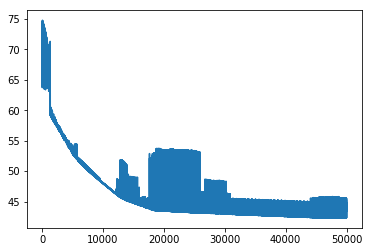

In [104]:
plt.plot(range(len(losses)), losses)
plt.show()